In [1]:
# Importing required packages
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy.polynomial import Polynomial
from matplotlib.gridspec import GridSpec

In [2]:
# Appending the current working directory to the system path of python
curr_path=os.getcwd()
sys.path.append(curr_path)

In [3]:
%run my_table.ipynb

#################################################################################################
## Input parameters - BDH problem

In [4]:
# All input variables related to BDH example

# Input parameters: 
# 1. Oil field input parameters
# period            Number of periods of production, years
# reserve           Initial reserve, MMBD
# decline           Yearly decline rate, fraction
# prod_level        Initial yearly production level, MMBD
# op_cost           Variable operational cost per barrel of oil at Year 0, $
# op_cost_rate      Yearly growth rate for variable operational cost, fraction 
# price             Initial oil price per barrel, $
# price_growth      Yearly growth rate of oil price, fraction
# fixed_cost        Yearly fixed cost, MM$
# profit            Profit sharing rate, fraction
# dr                Risk-adjusted discount rate
# init_invest       Up=front investment, MM$

# BDH problema
period = 10
reserve = 90
prod_level = 9
decline = 0.15
op_cost = 10
op_cost_rate = 0.02
price = 25
price_growth = 0.0 # BDH = 0.03; Ahmandi&Bratvold = 0.00 
fixed_cost = 5
profit = 0.25
dr = 0.05  # BDH = 0.1 Ahmandi&Bratvold = 0.05 (used risk-neutral valuation approach)
rf = 0.05 # risk-free rate
init_invest = 180

frame, market_val, NPV = table_(period, reserve, prod_level, decline, op_cost, op_cost_rate, price, price_growth, fixed_cost, profit, dr, init_invest)

# My suggestion for production curve
#frame, market_val, NPV = table_w(period, reserve, prod_level, decline, op_cost, op_cost_rate, price, price_growth, fixed_cost, profit, dr, init_invest)

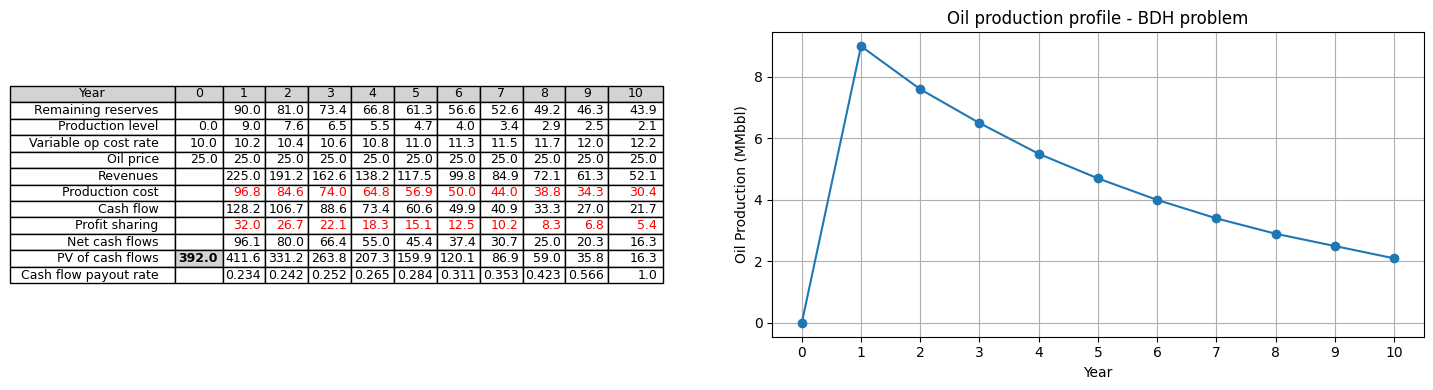

Value of the initial investment: $180.0
PV of cash flows: $392.0
Net Present Value: $212.0


In [5]:
# Plo table

%run plot_table.ipynb

#################################################################################################
## Geometrical Brownian Motion

In [6]:
# 2. Price model input parameters

# 2.1. Oil price model (OP)
# 2.1.1. Geometrical Brownian Motion (GBM) Model
p0_OP = price                # start price at time 0
mu_GBM_OP = price_growth     # annulazied drift parameter of GBM process
sigma_GBM_OP = 0.15           # annulazied volatility parameter of GBM process

# 2.2. Variable operating cost model (VOC)
# 2.2.1. Geometrical Brownian Motion (GBM) Model
p0_VOC = op_cost
mu_GBM_VOC = op_cost_rate
sigma_GBM_VOC = 0.10


In [7]:
# 3. Model configuration

# trialno       number of simulation trials or paths
# T             total time in years (also called deltaT)
# rf            risk-free rate
# dr            Risk-adjusted discount rate
# DR            discount rate coefficient (=1/(1+r))

trialno = 10000
T = 10

dt = 1/1                        # granularity of time-period 
time = np.arange(dt, T+dt, dt)  # time points
N = len(time)                   # number of time intervals

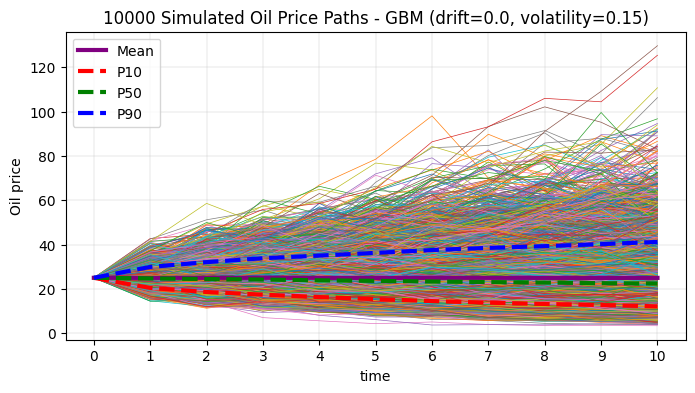

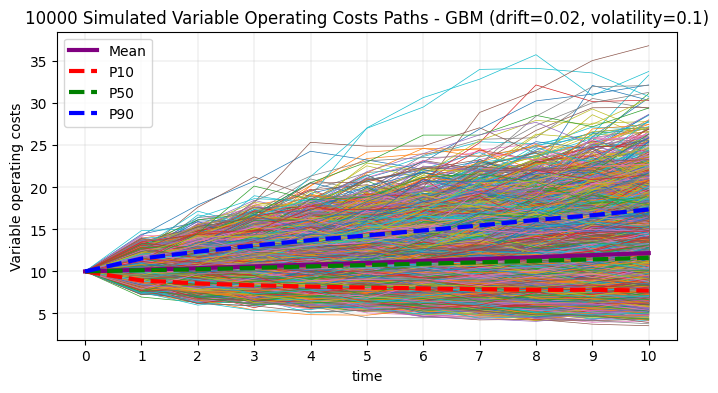

In [8]:
%run GBM_function.ipynb

#################################################################################################
## Cash Flow

In [9]:
# CASH FLOW
%run cash_flow.ipynb

CASH FLOW
             0           1           2           3           4           5   \
Path 1      0.0   173.43431  220.702021  152.188884  103.479819   87.498386   
Path 2      0.0  128.342727   79.869447   65.271806   73.073594   45.482399   
Path 3      0.0  105.056506  126.269575   154.75231  141.197488  125.325919   
0           ...         ...         ...         ...         ...         ...   
Path 9998   0.0   129.27264  109.029038   74.408401   22.417046    9.803215   
Path 9999   0.0   83.786522   72.813353    45.25755   45.212895   34.080643   
Path 10000  0.0   85.880945   76.228744  101.996428   58.442651   61.128701   

                   6          7          8          9          10  
Path 1      75.012144  52.142554  40.204967  24.729736  24.416221  
Path 2      11.958065  10.143915  20.774354  25.233149  14.348825  
Path 3      94.787207  83.946319  81.644325  82.447585  76.302401  
0                 ...        ...        ...        ...        ...  
Path 9998   -2.00

#################################################################################################
## Value of the project without options

In [10]:
%run present_value.ipynb

Value of the initial investment: $180.0
PV of cash flows: $392.2
Value of the project without options (NPV): $212.2


#################################################################################################
## Value of the project with options

In [17]:
# LSM approach (regression used)
degree = 2
poly_type = 'poly'  # poly_type (str): Type of polynomial ('poly', 'hermite', 'legendre', 'chebyshev', 'jacobi', 'laguerre').

%run regressions.ipynb

# years to exercise options on a list
option_times = [1,2,3,4,5,6,7,8,9,10]
# The list of options must be written in the form of a dictionary with option label as the key, and option expense and cash flow reward as the value.
options = {'continue': [0, 0], 'buyout': [40, 25], 'divest': [0, 100]}

#################################################################################################
## run code

In [18]:
%run apply_options.ipynb

Options times:   0%|          | 0/10 [00:00<?, ?time/s]

Value of the initial investment: $180.0
PV of cash flows: $483.0
Value of the project with options (NPV): $303.0
Option value: $90.8


## End

#####################################################################################################################

## Analysis

In [19]:
import pandas as pd

def count_option_occurrences(df_options):
    """
    Counts occurrences of 'buyout', 'continue', and 'divest' in each column of a DataFrame.

    Parameters:
    df_options (pd.DataFrame): DataFrame containing categorical values ('buyout', 'continue', 'divest').

    Returns:
    pd.DataFrame: DataFrame with counts of each option per column.
    """
    # Define the options to count
    options = ['buyout', 'continue', 'divest']
    
    # Count occurrences of each option in every column
    option_counts = {option: df_options.apply(lambda col: (col == option).sum()) for option in options}
    
    # Convert dictionary to DataFrame
    result_df = pd.DataFrame(option_counts)
    
    return result_df

count_option_occurrences(df_options).T

,0,1,2,3,4,5,6,7,8,9,10
buyout,0,9949,3,1,0,0,0,0,0,0,0
continue,0,32,9687,8974,7871,6536,4980,3278,1409,108,0
divest,0,19,291,715,1104,1335,1556,1702,1869,1301,108


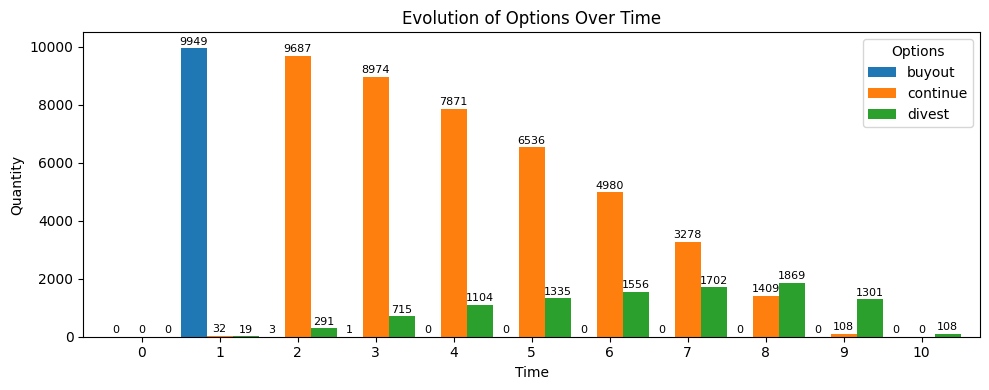

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo

# Criando o DataFrame
df = pd.DataFrame(count_option_occurrences(df_options).T, index=["buyout", "continue", "divest"]).T

# Plotando o gráfico de barras
ax = df.plot(kind='bar', figsize=(10, 4), width=1.)

# Adicionando os valores nas barras
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posição x (centro da barra)
        p.get_height() + 50,           # Posição y (topo da barra + pequeno deslocamento)
        f'{int(p.get_height())}',      # Texto (valor da barra)
        ha='center',                   # Alinhamento horizontal (centro)
        va='bottom',                   # Alinhamento vertical (base)
        fontsize=8                     # Tamanho da fonte
    )

# Configurações adicionais
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Evolution of Options Over Time')
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal
plt.legend(title='Options')  # Legenda fora do gráfico
plt.ylim(0, 10500)
# Mostrando o gráfico
plt.tight_layout()
plt.show()

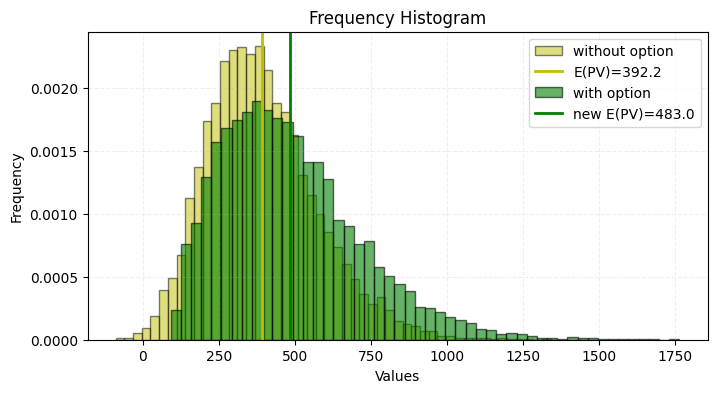

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_and_frequency(s1, s2, bins=50):
    plt.figure(figsize=(8, 4))

    # Plot histogram with density normalization to match KDE scale
    plt.hist(s1, bins=bins, density=True, color='y', alpha=0.5, edgecolor='black', label="without option")
    #sns.kdeplot(s1, fill=True, color='y', alpha=0.6, linewidth=1, label="without option")
    plt.axvline(x=np.mean(s1), color='y', linestyle='-', linewidth=2, label=f'E(PV)={np.mean(s1):.1f}')

    plt.hist(s2, bins=bins, density=True, color='g', alpha=0.6, edgecolor='black', label="with option")
    #sns.kdeplot(s2, fill=True, color='g', alpha=0.6, linewidth=1, label="with option")
    plt.axvline(x=np.mean(s2), color='g', linestyle='-', linewidth=2, label=f'new E(PV)={np.mean(s2):.1f}')
    
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Frequency Histogram")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.2)
    plt.show()
s1 = present_value(df1, dr)
s2 = present_value(df_cf_options, dr)

plot_density_and_frequency(s1, s2)



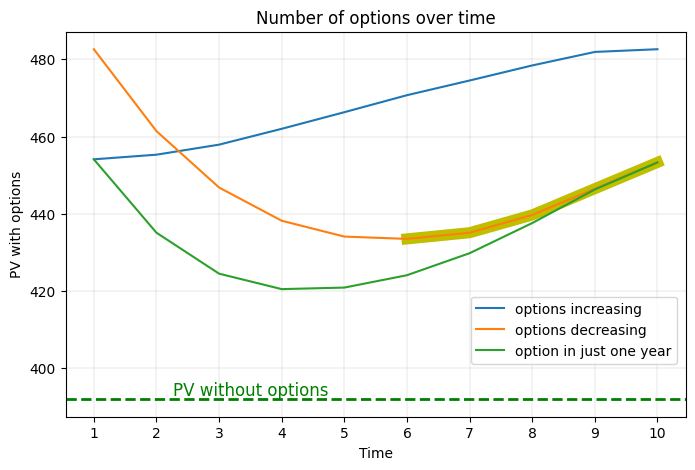

In [30]:
op_cres = [454.1, 455.3, 457.9, 462.0, 466.3, 470.7, 474.5, 478.4, 481.9, 482.6]
op_decres = [482.6, 461.4, 446.8, 438.2, 434.1, 433.5, 435.1, 439.7, 446.5, 453.3]
op_1op = [454.1, 435.1, 424.5, 420.5, 420.9, 424.1, 429.8, 437.6, 446.3, 453.3]
t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

op_decres_tt = [433.5, 435.1, 439.7, 446.5, 453.3]
tt = [6, 7, 8, 9, 10]

plt.figure(figsize=(8, 5))

plt.plot(tt, op_decres_tt, color='y', linewidth=8)

plt.plot(t, op_cres, label='options increasing')
plt.plot(t, op_decres, label='options decreasing')
plt.plot(t, op_1op, label='option in just one year')
plt.axhline(392.0, color='g', linestyle='--', linewidth=2)
plt.text(x=3.5, y=393.0, s='PV without options', color='g', fontsize=12, ha='center')
plt.xticks(t)
plt.xlabel('Time')
plt.ylabel('PV with options')
plt.title('Number of options over time')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='lower center', bbox_to_anchor=(0.82, 0.12))
plt.grid(linewidth=0.2)
plt.show()